In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
# from sklearn.datasets import load_boston
# from sklearn.datasets import load_iris, load_breast_cancer
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# 
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_val_predict
# from sklearn.ensemble import RandomForestClassifier


# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV



In [2]:
data_ = pd.read_csv("./data/cleaned_data.csv")

In [3]:
data_.columns
data_.head()

,ujahr,umonat,weekday,uwochentag,long,lat,time_of_day,ustunde,light_condition,ulichtverh,...,uart,utyp1,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,ukategorie,accident_outcome
0,2018,1,Wed,4,52.513597,13.475018,afternoon,15,daylight,0,...,6,4,0,1,1,0,0,0,3,slightly_injured
1,2018,1,Mon,2,52.587259,13.291022,morning,11,daylight,0,...,2,6,0,1,0,0,0,0,3,slightly_injured
2,2018,1,Tue,3,52.526019,13.420578,morning,9,daylight,0,...,6,4,0,1,1,0,0,0,3,slightly_injured
3,2018,1,Mon,2,52.481844,13.348288,afternoon,17,dark,2,...,6,7,0,1,1,0,0,0,3,slightly_injured
4,2018,1,Wed,4,52.583472,13.403228,afternoon,15,dusk,1,...,6,7,1,0,1,0,0,0,3,slightly_injured


In [4]:
data_["death"] = list(map(lambda x: 1 if x == "killed" else 0, data_.accident_outcome))

In [21]:
X = data_.drop(columns=["death", "accident_outcome", "ukategorie", "weekday", "time_of_day", "light_condition", "street_condition"], axis = 1)
y = data_["death"]

y.value_counts()
y


0        0
1        0
2        0
3        0
4        0
        ..
38846    0
38847    0
38848    0
38849    0
38850    0
Name: death, Length: 38851, dtype: int64

In [46]:
# upsampling

In [27]:
smote = SMOTE()

In [28]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    38731
1    38731
Name: death, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)

Tree plot


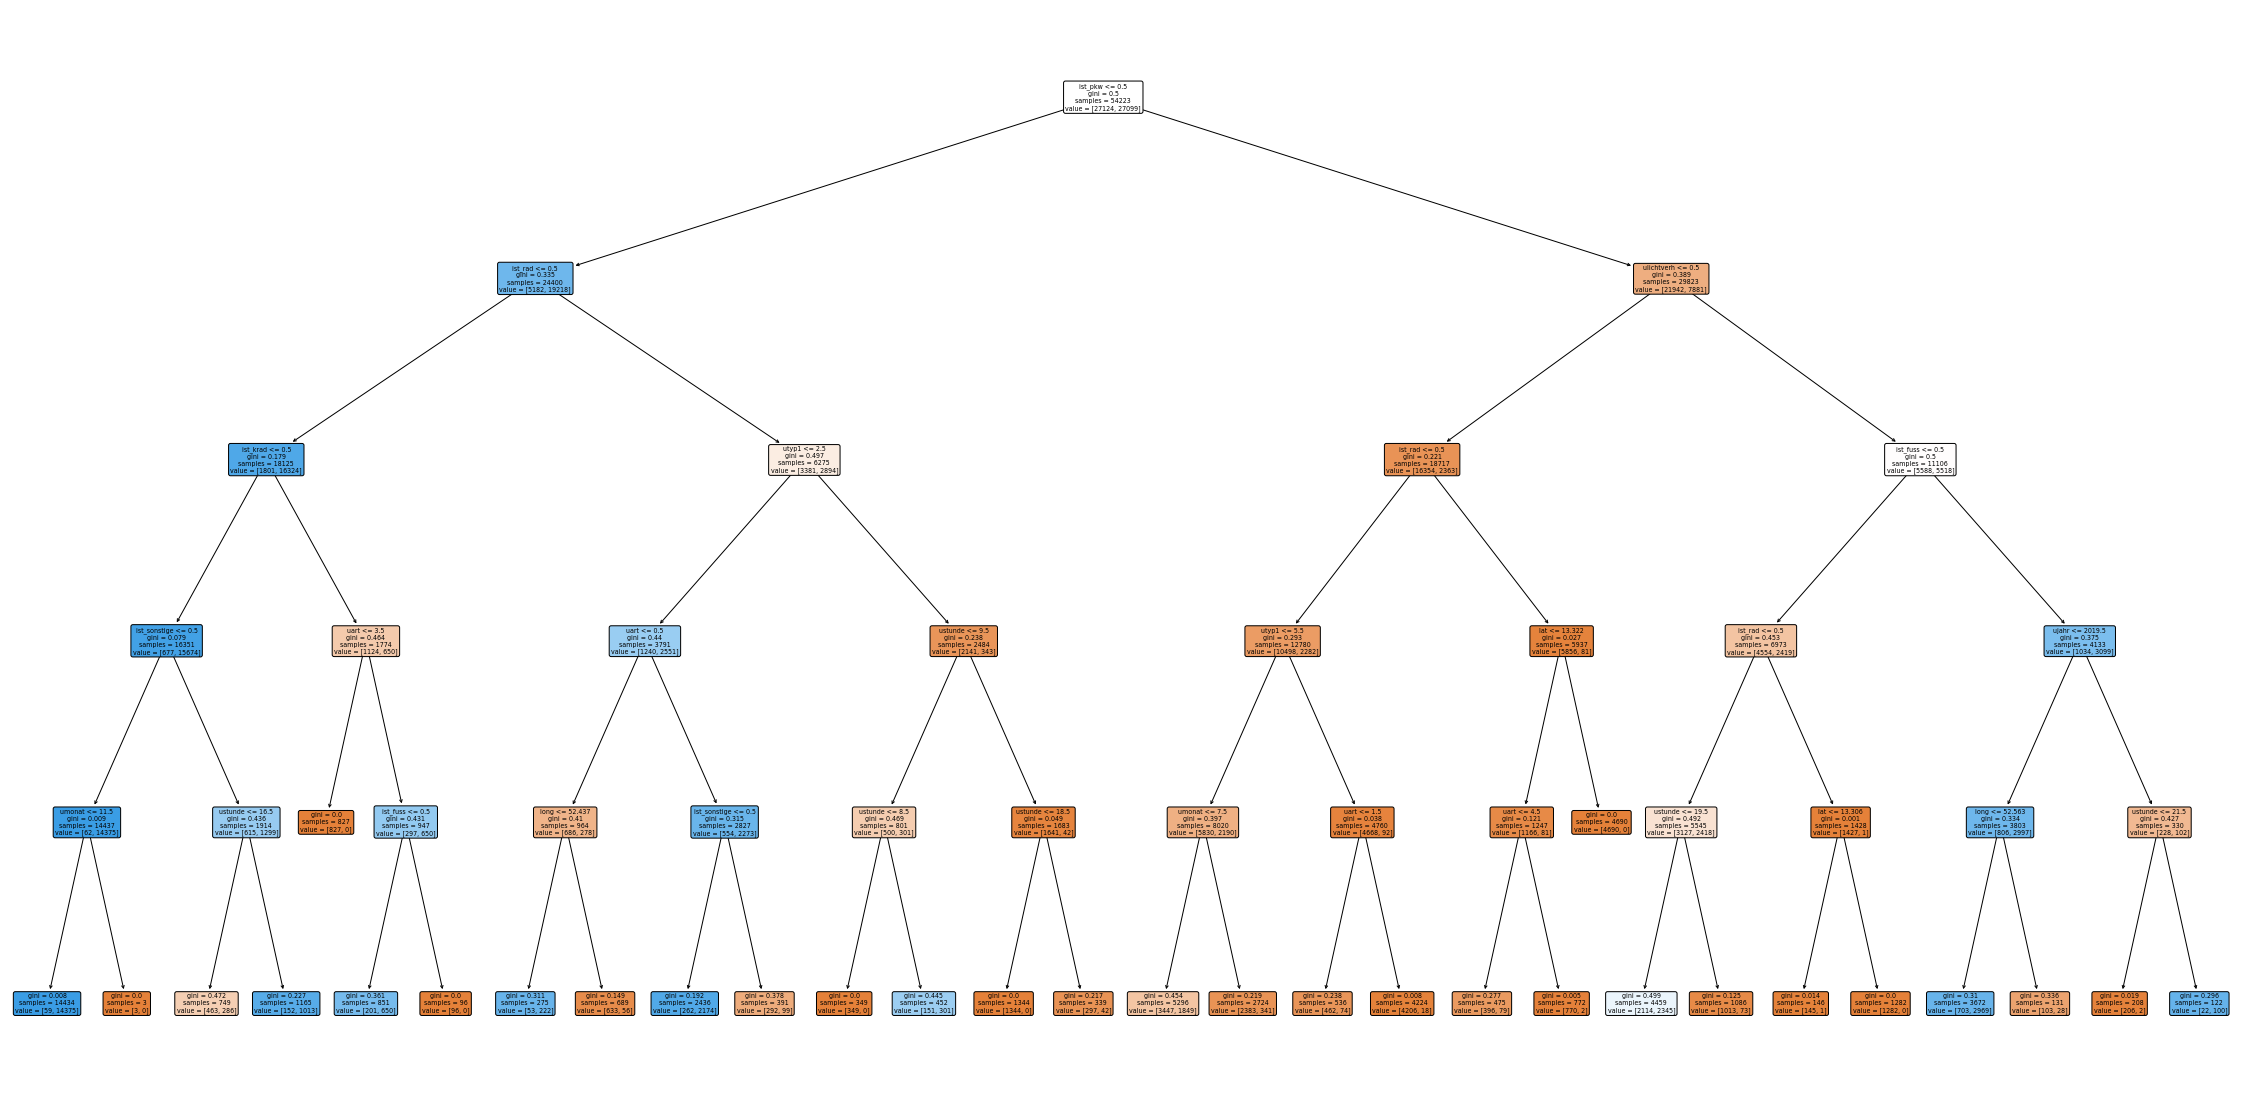

In [33]:
compare_performance_df = pd.DataFrame()

for depth in range(5,6):
    dt = DecisionTreeClassifier(max_depth=depth)

    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    performance_df = pd.DataFrame({"depth" : depth,
                                   'error_metric': ['Accuracy','Precision','Recall'],
                                   'train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label=1),
                                             recall_score(y_train, y_pred_train_dt, pos_label=1)],
                                   'test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label=1),
                                            recall_score(y_test, y_pred_test_dt, pos_label=1)]})
    
    compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)

print("Tree plot")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,20)) # ,dpi=200)

plot_tree(dt,filled = True, rounded=True, feature_names = X.columns)
plt.show() 

In [31]:
compare_performance_df

,depth,error_metric,train,test
0,2,Accuracy,0.768069,0.768536
1,2,Precision,0.900634,0.903784
2,2,Recall,0.602384,0.601616
0,3,Accuracy,0.839072,0.841215
1,3,Precision,0.878435,0.880073
2,3,Recall,0.786893,0.790492
0,4,Accuracy,0.855430,0.859719
1,4,Precision,0.902457,0.907674
2,4,Recall,0.796856,0.801238
0,5,Accuracy,0.877045,0.877749


,Error_metric,Train,Test
0,Accuracy,1.0,1.0
1,Precision,1.0,1.0
2,Recall,1.0,1.0


Confusion matrix for the train set
[[27102     0]
 [    0    93]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


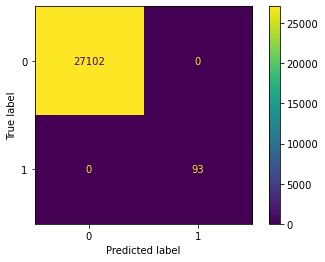



Confusion matrix for the test set
[[11629     0]
 [    0    27]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


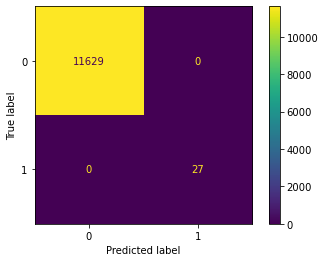

In [9]:
log_model = LogisticRegression() 


trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [34]:
len(data_)

38851

In [ ]:
# 